## Analysez les ventes d'une librairie 2- restitution de l’analyse

# Sommaire :

**Partie 1 : Demande d'Antoine **
 - <a href="#C1">Indicateurs et graphiques autour du chiffre d'affaires </a>
 - <a href="#C2">Décomposition en moyenne mobile </a>
 - <a href="#C3">Zoom sur les références, les tops et les flops </a>   
 - <a href="#C4">Les profils de nos clients </a>

**Partie 2 : Demande de Julie ** 

 - <a href="#C5">Le lien entre le genre d’un client et les catégories des livres achetés </a>
 - <a href="#C6">Le lien entre l’âge des clients et le montant total des achats </a>
 - <a href="#C7">Le lien entre l’âge des clients et la fréquence d’achat </a>
 - <a href="#C8">Le lien entre l’âge des clients et la taille du panier moyen </a>
 - <a href="#C8">Le lien entre l’âge des clients et les catégories des livres achetés </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [2]:
df= pd.read_csv('C:/Users/ai.ge/Documents/Formation/df.csv')
df

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,71,12.99,0.0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,45,10.99,1.0
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,34,12.99,0.0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,36,4.98,0.0


# <a name="C1"> Antoine 1 - Indicateurs et graphiques autour du chiffre d'affaires </a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   sex         679332 non-null  object 
 5   birth       679332 non-null  int64  
 6   age         679332 non-null  int64  
 7   price       679332 non-null  float64
 8   categ       679332 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 46.6+ MB


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   age         679332 non-null  int64         
 7   price       679332 non-null  float64       
 8   categ       679332 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 46.6+ MB


In [5]:
print('Transactions du', str(df['date'].min())[:10], 'au', str(df['date'].max())[:10])

Transactions du 2021-03-01 au 2023-02-28


In [6]:
df1=df.set_index(df.date)
df1

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
date,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0
2022-02-02 07:55:19.149409,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0
2022-06-18 15:44:33.155329,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0
2021-06-24 04:19:29.835891,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0
2023-01-11 08:22:08.194479,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0
...,...,...,...,...,...,...,...,...,...
2022-01-15 13:05:06.246925,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,71,12.99,0.0
2022-03-19 16:03:23.429229,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,45,10.99,1.0
2022-12-20 04:33:37.584749,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,34,12.99,0.0


In [7]:
ca = df1.groupby(pd.Grouper(freq="M"))["price"].sum().reset_index()
ca

,date,price
0,2021-03-31,482530.52
1,2021-04-30,476249.16
2,2021-05-31,493023.39
3,2021-06-30,484158.49
4,2021-07-31,482875.36
5,2021-08-31,482374.70
6,2021-09-30,507360.56
7,2021-10-31,320868.67
8,2021-11-30,516267.63
9,2021-12-31,525987.21


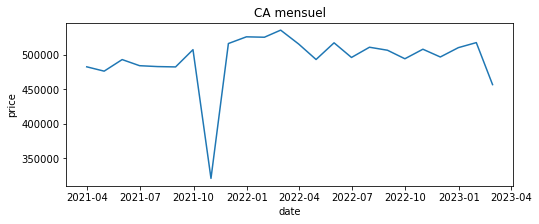

In [8]:
plt.figure(figsize=(8,3))
sns.lineplot(data=ca, y='price', x='date')
plt.title('CA mensuel')
plt.show()

In [9]:
vente=df1.groupby(pd.Grouper(freq="M"))["session_id"].count().reset_index()
vente

,date,session_id
0,2021-03-31,28610
1,2021-04-30,28457
2,2021-05-31,28293
3,2021-06-30,26857
4,2021-07-31,24742
5,2021-08-31,25659
6,2021-09-30,33326
7,2021-10-31,21606
8,2021-11-30,28321
9,2021-12-31,32464


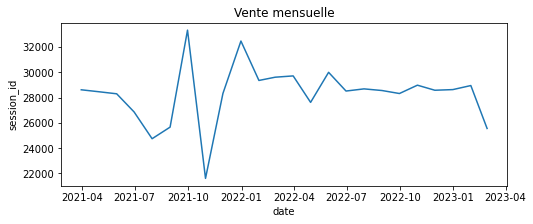

In [10]:
plt.figure(figsize=(8,3))
sns.lineplot(data=vente, y='session_id', x='date')
plt.title('Vente mensuelle')
plt.show()

In [11]:
kpi= vente.merge(ca,on='date', how='inner')
kpi

,date,session_id,price
0,2021-03-31,28610,482530.52
1,2021-04-30,28457,476249.16
2,2021-05-31,28293,493023.39
3,2021-06-30,26857,484158.49
4,2021-07-31,24742,482875.36
5,2021-08-31,25659,482374.70
6,2021-09-30,33326,507360.56
7,2021-10-31,21606,320868.67
8,2021-11-30,28321,516267.63
9,2021-12-31,32464,525987.21


In [12]:
kpi['kpi']=round(kpi['price']/kpi['session_id'],2)
kpi

,date,session_id,price,kpi
0,2021-03-31,28610,482530.52,16.87
1,2021-04-30,28457,476249.16,16.74
2,2021-05-31,28293,493023.39,17.43
3,2021-06-30,26857,484158.49,18.03
4,2021-07-31,24742,482875.36,19.52
5,2021-08-31,25659,482374.70,18.80
6,2021-09-30,33326,507360.56,15.22
7,2021-10-31,21606,320868.67,14.85
8,2021-11-30,28321,516267.63,18.23
9,2021-12-31,32464,525987.21,16.20


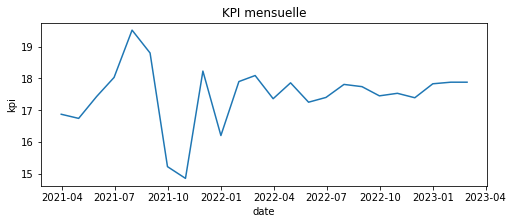

In [13]:
plt.figure(figsize=(8,3))
sns.lineplot(data=kpi, y='kpi', x='date')
plt.title('KPI mensuelle')
plt.show()

on peut observer un chute de vente en octobre 2021

# <a name="C2"> Antoine 2 - Décomposition en moyenne mobile </a>

In [14]:
price=df1['price']
price

date
2022-05-20 13:21:29.043970     4.18
2022-02-02 07:55:19.149409    15.99
2022-06-18 15:44:33.155329     7.99
2021-06-24 04:19:29.835891    69.99
2023-01-11 08:22:08.194479     4.99
                              ...  
2022-01-15 13:05:06.246925    12.99
2022-03-19 16:03:23.429229    10.99
2022-12-20 04:33:37.584749    12.99
2021-07-16 20:36:35.350579     4.98
2022-09-28 01:12:01.973763    23.99
Name: price, Length: 679332, dtype: float64

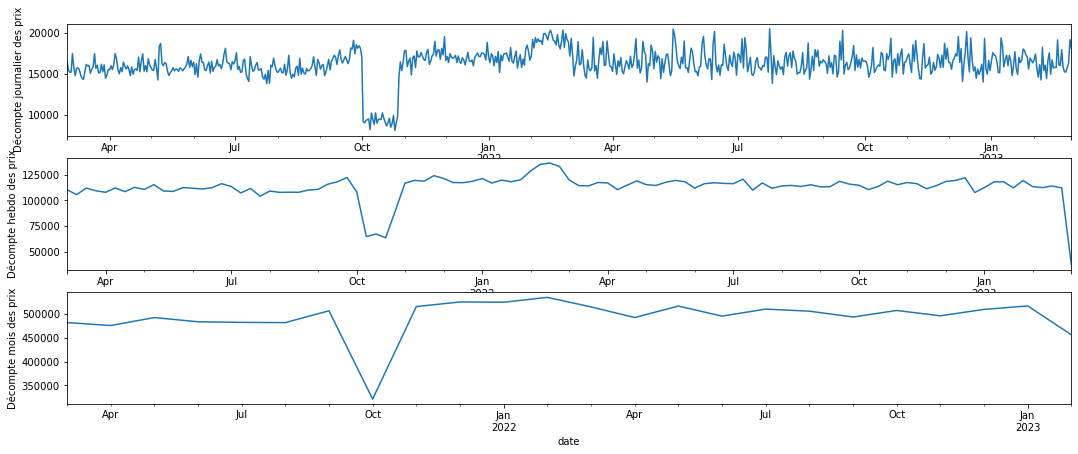

In [15]:
fig, ax = plt.subplots(3, figsize=(18,7))

price_j = price.resample('D').sum()
price_j.plot(ax=ax[0],legend=False)
ax[0].set_ylabel('Décompte journalier des prix')

price_w =  price.resample('W').sum()
price_w.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Décompte hebdo des prix');

price_m =  price.resample('M').sum()
price_m.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Décompte mois des prix');

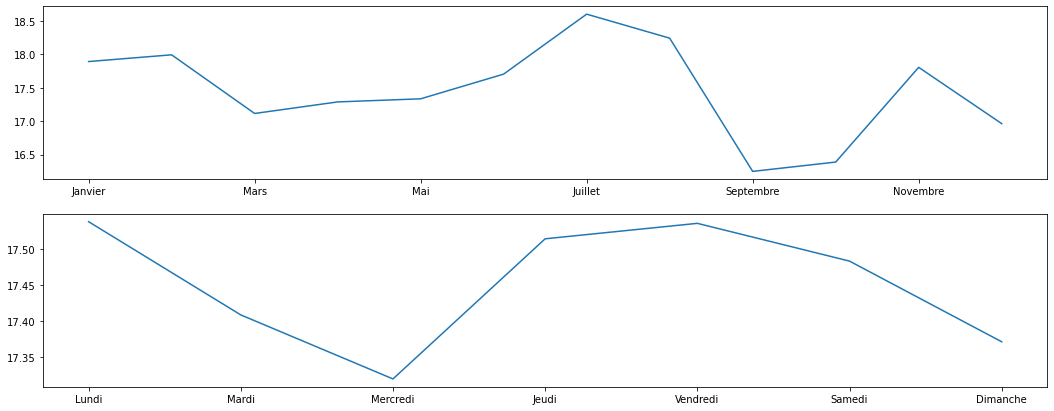

In [16]:
fig, ax = plt.subplots(2,figsize=(18,7))

by_m = price.groupby(price.index.month).mean()
by_m.index = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
by_m.plot(ax=ax[0], legend=False);

by_w = price.groupby(price.index.dayofweek).mean()
by_w.index = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
by_w.plot(ax=ax[1], legend=False);

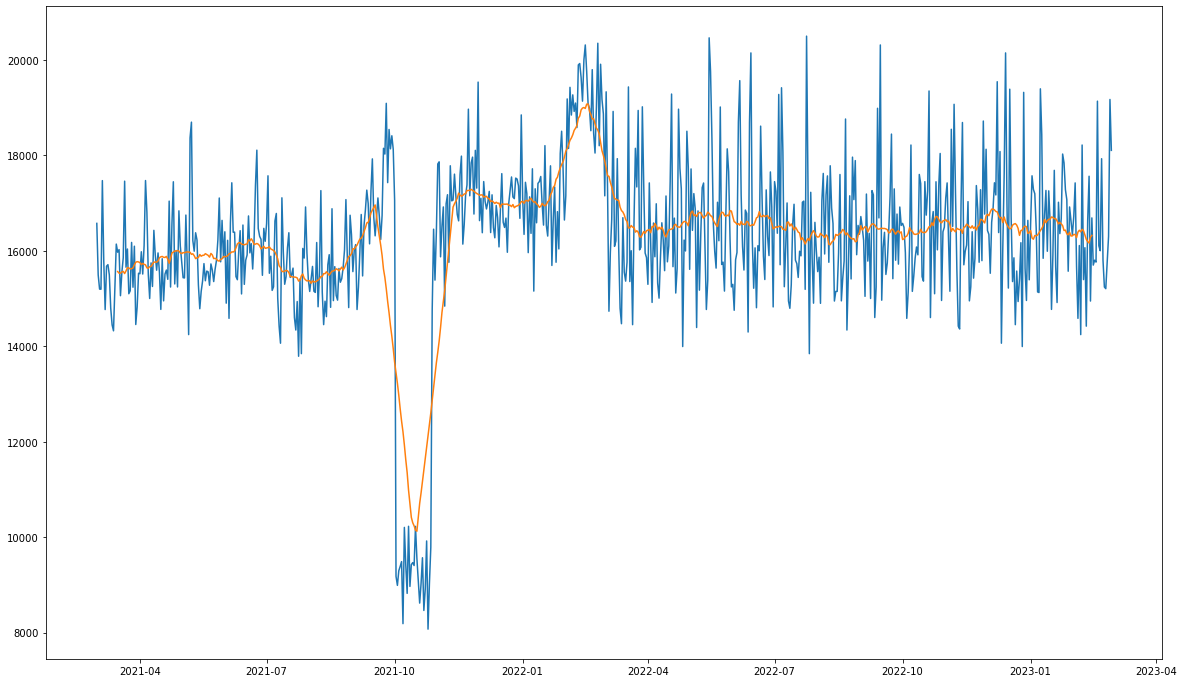

In [17]:
plt.figure(figsize=(20,12))
plt.plot(price_j)
plt.plot(price_j.rolling(30, center=True).mean())
plt.show()

Rolling sur 30 jours, on va la tendance de vente reste stable. 

# <a name="C3"> Antoine 3 - Zoom sur les références, les tops et les flops </a>

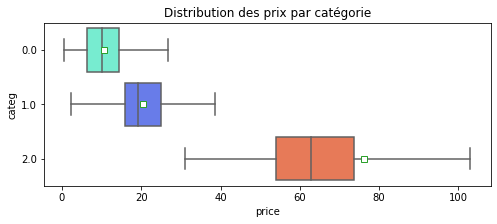

In [18]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df, y='categ', x='price', orient='h', showfliers=False, showmeans=True, palette=["#64ffda", "#536dfe", "#ff6e40"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par catégorie')
plt.show()

categorie 2 a de prix plus élevée. 

In [19]:
product=df.pivot_table(index=['id_prod','categ'], aggfunc={'price': np.sum})
product

,,price
id_prod,categ,
0_0,0.0,4657.50
0_1,0.0,5352.13
0_10,0.0,394.90
0_100,0.0,61.80
0_1000,0.0,2954.88
...,...,...
2_95,2.0,395.96
2_96,2.0,28650.18
2_97,2.0,2092.87


In [20]:
tops=product.sort_values(by='price', ascending=False).reset_index().head(10)
tops

,id_prod,categ,price
0,2_159,2.0,94893.50
1,2_135,2.0,69334.95
2,2_112,2.0,65407.76
3,2_102,2.0,60736.78
4,2_209,2.0,56971.86
5,1_395,1.0,54356.25
6,1_369,1.0,54025.48
7,2_110,2.0,53846.25
8,2_39,2.0,53060.85
9,2_166,2.0,52449.12


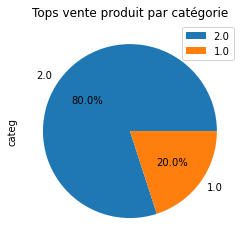

In [21]:
tops['categ'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Tops vente produit par catégorie')
plt.show()

Les Tops ventes sont presents plus dans categorie 2

In [22]:
flops=product.sort_values(by='price', ascending=True).reset_index().head(10)
flops

,id_prod,categ,price
0,0_1539,0.0,0.99
1,0_1284,0.0,1.38
2,0_1653,0.0,1.98
3,0_541,0.0,1.99
4,0_807,0.0,1.99
5,0_1601,0.0,1.99
6,0_1728,0.0,2.27
7,0_1498,0.0,2.48
8,0_898,0.0,2.54
9,0_1840,0.0,2.56


Les ventes font moinsde CA sont des produits categorie 0

Incide de Gini : 0.742838572526052


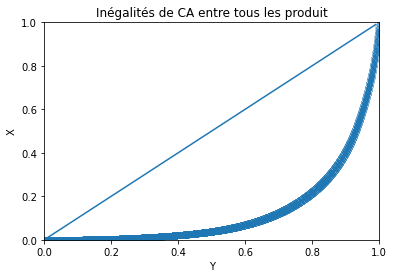

In [23]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    plt.show()
    
# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(product['price'], 'Inégalités de CA entre tous les produit')

L'indice de Gini mesure ici l'inégalité des chiffres d'affaires de tous les produits. un coefficient de 0 indiquerait une égalité parfaite. si l'indice était de 1, un seul produit détiendrait la totalité du chiffre d'affaires. La courbe de Lorenz montre que les 20% de produits représentent à 80% de CA.

# <a name="C4"> Antoine 4 - Les profils de nos clients </a>
Enfin, j’aimerais avoir quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.

<AxesSubplot:>

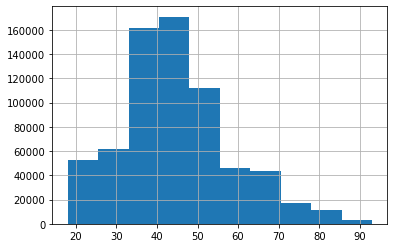

In [24]:
df['age'].hist()

In [25]:
def category_ages(age):
    if age<=20:
        return '<20ans'
    elif (age>20)&(age<=30):
        return '20-30 ans'
    elif (age>30)&(age<=40):
        return '30-40 ans'
    elif (age>40)&(age<=50):
        return '40-50 ans'
    elif (age>50)&(age<=60):
        return '50-60 ans'
    elif (age>60)&(age<=70):
        return '60-70 ans'
    else:
        return '+70 ans'
df['category_ages']=df['age'].map(category_ages)
df

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,category_ages
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0,30-40 ans
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0,30-40 ans
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0,50-60 ans
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0,20-30 ans
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0,40-50 ans
...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,71,12.99,0.0,+70 ans
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,45,10.99,1.0,40-50 ans
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,34,12.99,0.0,30-40 ans
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,36,4.98,0.0,30-40 ans


In [26]:
df=df.drop(['birth'], axis=1)
df

,id_prod,date,session_id,client_id,sex,age,price,categ,category_ages
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,36,4.18,0.0,30-40 ans
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,34,15.99,1.0,30-40 ans
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,54,7.99,0.0,50-60 ans
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,22,69.99,2.0,20-30 ans
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,42,4.99,0.0,40-50 ans
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,71,12.99,0.0,+70 ans
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,45,10.99,1.0,40-50 ans
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,34,12.99,0.0,30-40 ans
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,36,4.98,0.0,30-40 ans


In [27]:
client=df.pivot_table(index=['client_id','sex','age','category_ages'], aggfunc={'price': np.sum})
client

,,,,price
client_id,sex,age,category_ages,
c_1,m,67,60-70 ans,558.18
c_10,m,66,60-70 ans,1353.60
c_100,m,30,20-30 ans,254.85
c_1000,f,56,50-60 ans,2261.89
c_1001,m,40,30-40 ans,1812.86
...,...,...,...,...
c_995,m,67,60-70 ans,189.41
c_996,f,52,50-60 ans,1625.58
c_997,f,28,20-30 ans,1490.01


In [28]:
client.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8600 entries, ('c_1', 'm', 67, '60-70 ans') to ('c_999', 'm', 58, '50-60 ans')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   8600 non-null   float64
dtypes: float64(1)
memory usage: 177.2+ KB


In [29]:
client_major=client.sort_values(by='price', ascending=False).reset_index()
client_major.head(10)

,client_id,sex,age,category_ages,price
0,c_1609,m,42,40-50 ans,324033.35
1,c_4958,m,23,20-30 ans,289760.34
2,c_6714,f,54,50-60 ans,153658.86
3,c_3454,m,53,50-60 ans,113667.90
4,c_3263,f,37,30-40 ans,5276.87
5,c_1570,f,43,40-50 ans,5271.62
6,c_2899,f,28,20-30 ans,5214.05
7,c_2140,f,45,40-50 ans,5208.82
8,c_7319,f,48,40-50 ans,5155.77
9,c_8026,m,44,40-50 ans,5092.57


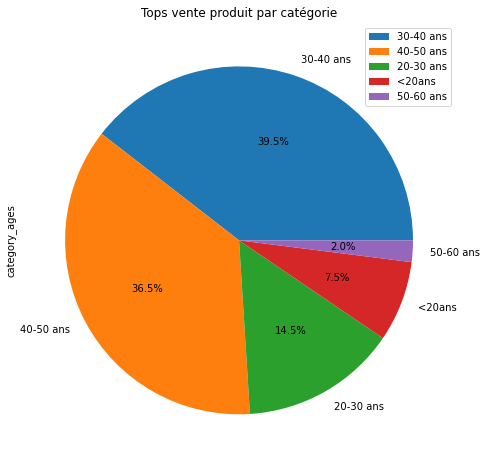

In [30]:
plt.figure(figsize=(12,8))
client_TOP_200= client_major.head(200)
client_TOP_200['category_ages'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Tops vente produit par catégorie')
plt.show()

Classes âge 30-40 ans et 40-50 ans sont des clients font plus d'achat

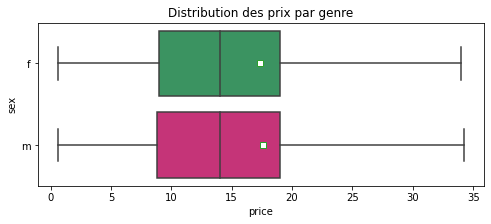

In [31]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df, y='sex', x='price', orient='h', showfliers=False, showmeans=True, palette=["#2ca25f", "#dd1c77"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par genre')
plt.show()

Les achats entre homme et femme sont equilibrés

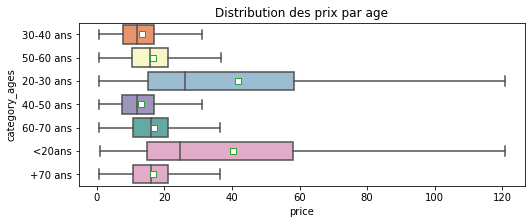

In [32]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df, 
            y='category_ages',
            x='price', orient='h', 
            showfliers=False, showmeans=True, 
            palette=["#fc8d59", "#ffffbf", "#91bfdb","#998ec3","#5ab4ac","#e9a3c9","#e9a3c9"], 
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par age')
plt.show()

Les paniers les plus elevés sont les calsses âge moins de 30 ans

Incide de Gini : 0.4463949039188957


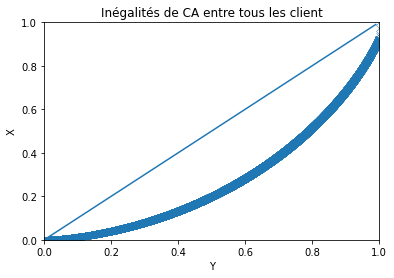

In [33]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    plt.show()
    
# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(client['price'], 'Inégalités de CA entre tous les client')

Courbe de Lorenz indique 20% de client font plus de 50% de CA

# <a name="C5"> Julie 1 - Le lien entre le genre d’un client et les catégories des livres achetés </a>
la corrélation entre 2 variables qualitatives.

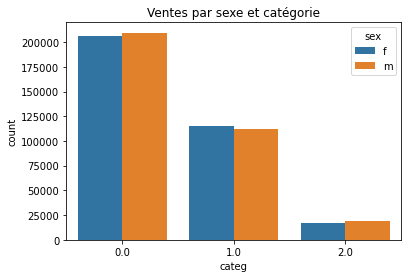

In [34]:
sns.countplot(data=df, x='categ', hue='sex')
plt.title('Ventes par sexe et catégorie')
plt.show()

In [35]:
crosstab = pd.crosstab(df['categ'], df['sex'], margins=False)
print('Table de contingence :')
print(crosstab)

Table de contingence :
sex         f       m
categ                
0.0    206220  209460
1.0    114899  112270
2.0     17283   19200


In [36]:
crosstab = pd.crosstab(df['categ'], df['sex'], margins=False)
print('Table de contingence :')
print(crosstab)

Table de contingence :
sex         f       m
categ                
0.0    206220  209460
1.0    114899  112270
2.0     17283   19200


Hypothèse: H0: les categories sont indépendant du sex Ha: les categories sont associées au sex test chi2, on rejete l'hypothèse nulle si la valeur de p est inférieure à 0,05. La valeur-p de 0,05 signifie qu'il y a une chance sur 20 qu'une hypothèse correcte soit rejetée plusieurs fois lors d'une multitude de tests.

In [37]:
stats.chi2_contingency(crosstab)

(147.00253568681114,
 1.1989607410166063e-32,
 2,
 array([[207066.56444861, 208613.43555139],
        [113161.81769444, 114007.18230556],
        [ 18173.61785695,  18309.38214305]]))

P-value<0.05, il y a dependance entre les catégories et le sexe.

# <a name="C6"> Julie 2 - Le lien entre l’âge des clients et le montant total des achats </a>
la corrélation entre 2 variables quantitatives.

In [38]:
client_ca=df.pivot_table(
    index='client_id', values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'total_achats'})
client_ca

,client_id,total_achats
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86
...,...,...
8595,c_995,189.41
8596,c_996,1625.58
8597,c_997,1490.01
8598,c_998,2779.88


In [39]:
df2 = df.merge(client_ca,on='client_id', how='left')
df2.sample(3)

,id_prod,date,session_id,client_id,sex,age,price,categ,category_ages,total_achats
237234,1_448,2022-10-15 18:25:12.112932,s_282972,c_6799,f,74,13.79,1.0,+70 ans,2123.61
502969,1_432,2022-04-20 22:32:37.820203,s_197051,c_4545,f,36,24.20,1.0,30-40 ans,3189.84
636658,1_389,2022-03-31 09:39:18.812128,s_187210,c_8063,m,60,24.99,1.0,50-60 ans,3007.18


In [40]:
df2.isnull().sum()

id_prod          0
date             0
session_id       0
client_id        0
sex              0
age              0
price            0
categ            0
category_ages    0
total_achats     0
dtype: int64

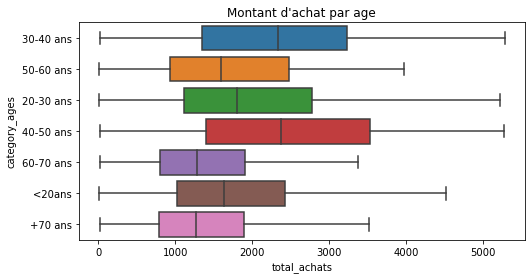

In [41]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df2, y='category_ages', x='total_achats', showfliers=False)
plt.title('Montant d\'achat par age')
plt.show()

On voit que les plus acheteurs sont l'age 30 ans - 50 ans.

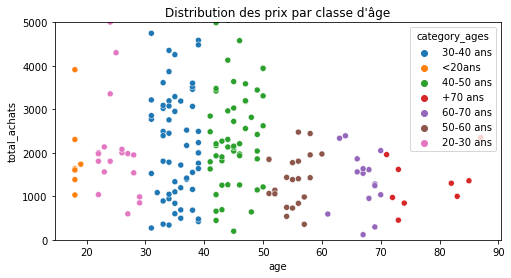

In [42]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df2.sample(200), x='age', y='total_achats', hue='category_ages')
plt.ylim([0, 5000])
plt.title('Distribution des prix par classe d\'âge')
plt.show()

Pas de corrélation sur les nuages de point.</br>
Test de Pearson ou l'estimation d'une régression linéaire, consiste à calculer le quotient de la covariance des deux variables aléatoires par le produit de leurs écarts-types.</br>
H0: L'age n'est pas corrélé au montant d'achat </br>
Ha: Les 2 variables sont corrélées

In [43]:
stats.pearsonr(df2['age'], df2['total_achats'])

(-0.04999539338547123, 0.0)

Une negative correlation indique 2 variables sont dans opposite directions. La valeur de p est inférieure à 0,05, on rejete l'hypothèse nulle. l’âge des clients et le montant total des achats sont corrélées. 

# <a name="C7"> Julie 3 - Le lien entre l’âge des clients et la fréquence d’achat </a>

In [44]:
client_frq=df.pivot_table(
    index='client_id', values='session_id', 
    aggfunc='count').reset_index().rename(
    columns={'session_id': 'freq_achats'})
client_frq

,client_id,freq_achats
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102
...,...,...
8595,c_995,14
8596,c_996,95
8597,c_997,59
8598,c_998,53


In [45]:
df3 = df2.merge(client_frq,on='client_id', how='left')
df3

,id_prod,date,session_id,client_id,sex,age,price,categ,category_ages,total_achats,freq_achats
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,36,4.18,0.0,30-40 ans,2288.49,195
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,34,15.99,1.0,30-40 ans,3498.14,247
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,54,7.99,0.0,50-60 ans,153658.86,9187
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,22,69.99,2.0,20-30 ans,886.50,17
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,42,4.99,0.0,40-50 ans,2381.56,168
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,71,12.99,0.0,+70 ans,1088.84,73
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,45,10.99,1.0,40-50 ans,1186.77,84
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,34,12.99,0.0,30-40 ans,1692.89,117
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,36,4.98,0.0,30-40 ans,3056.29,234


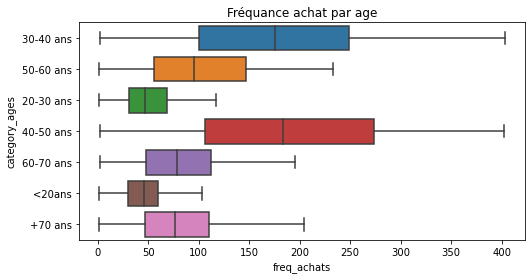

In [46]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df3, y='category_ages', x='freq_achats', showfliers=False)
plt.title('Fréquance achat par age')
plt.show()

Les clients de 30 à 50 ans font plus souvent les achats.

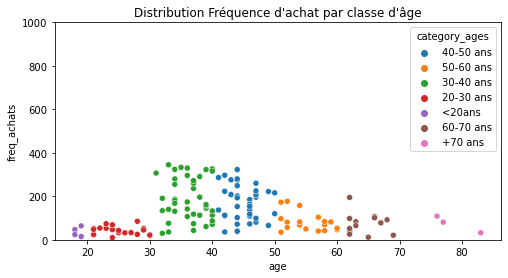

In [47]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df3.sample(150), x='age', y='freq_achats', hue='category_ages')
plt.ylim([0, 1000])
plt.title('Distribution Fréquence d\'achat par classe d\'âge')
plt.show()

Test de Pearson.
H0: L'age n'est pas corrélé au fréquence d'achat Ha: Les 2 variables sont corrélées

In [48]:
stats.pearsonr(df3['age'], df3['freq_achats'])

(-0.01860895810424451, 4.189586899607647e-53)

La valeur de p _valeu < 0,05, onrejete l'hypothèse nulle. l’âge des clients et fréquence d'achats sont corrélés.

# <a name="C8"> Julie 4 - Le lien entre l’âge des clients et la taille du panier moyen </a>
average basket= diviser CA par le nombre de commandes

In [49]:
df3['avg_b']=round (df3['total_achats']/df3['freq_achats'],2)
df3

,id_prod,date,session_id,client_id,sex,age,price,categ,category_ages,total_achats,freq_achats,avg_b
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,36,4.18,0.0,30-40 ans,2288.49,195,11.74
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,34,15.99,1.0,30-40 ans,3498.14,247,14.16
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,54,7.99,0.0,50-60 ans,153658.86,9187,16.73
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,22,69.99,2.0,20-30 ans,886.50,17,52.15
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,42,4.99,0.0,40-50 ans,2381.56,168,14.18
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,71,12.99,0.0,+70 ans,1088.84,73,14.92
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,45,10.99,1.0,40-50 ans,1186.77,84,14.13
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,34,12.99,0.0,30-40 ans,1692.89,117,14.47
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,36,4.98,0.0,30-40 ans,3056.29,234,13.06


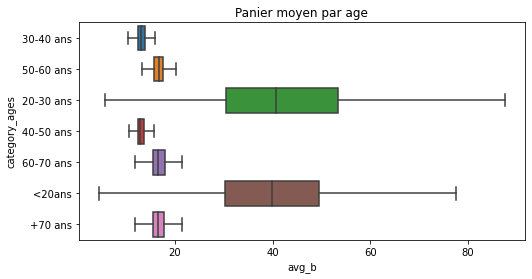

In [50]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df3, y='category_ages', x='avg_b', showfliers=False)
plt.title('Panier moyen par age')
plt.show()

age < 30 ans a plus gros PM

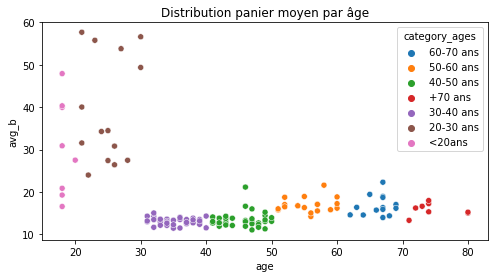

In [51]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df3.sample(150), x='age', y='avg_b', hue='category_ages')
plt.title('Distribution panier moyen par âge')
plt.show()

H0: L'age n'est pas corrélé au panier moyen Ha: Les 2 variables sont corrélées

In [52]:
stats.pearsonr(df3['age'], df3['avg_b'])

(-0.37545383179934444, 0.0)

stats pearson néfative, plus age avec plus gros panier moyen, p_value < 0.05, l'age et panier moyen sont corrélés.

# <a name="C9"> Julie 5 - Catégorie et âge: le lien entre l’âge des clients et les catégories des livres achetés </a>
L'analyse de la variance est utile pour vérifier la corrélation entre une qualitative et une quantitative.

<Figure size 576x360 with 0 Axes>

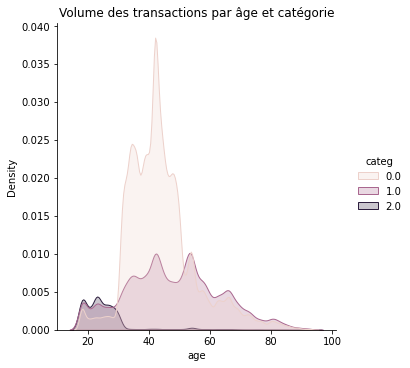

In [53]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x='age', hue='categ', kind='kde', fill=True)
plt.title('Volume des transactions par âge et catégorie')
plt.show()

Les 3 catégories sont consommées par toutes les classes d'âge. Mais les acheteurs de la catégorie 0 sont principalement ces 30-50 ans, tandis que la catégorie 2 est consommée quasi exclusivement par les moins de 30 ans.

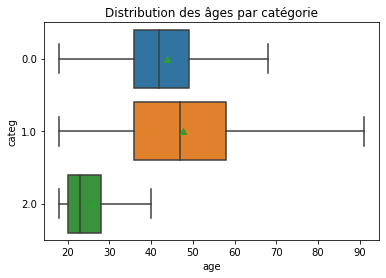

In [54]:
sns.boxplot(data=df, x='age', y='categ', orient='h', showfliers=False, showmeans=True)
plt.title('Distribution des âges par catégorie')
plt.show()

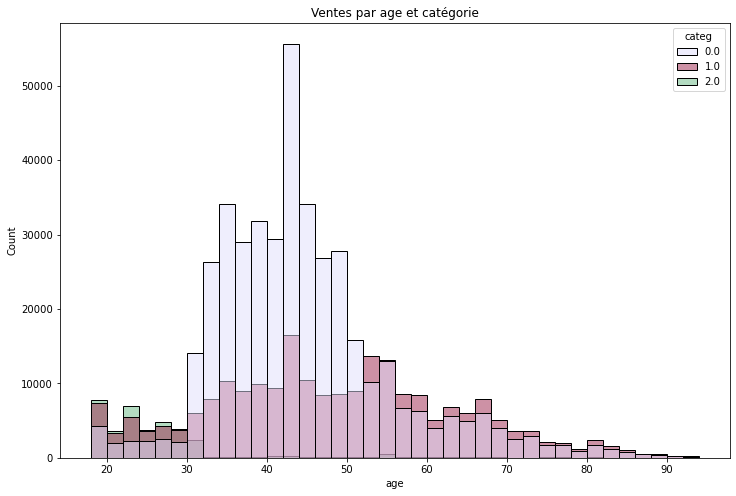

In [55]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='age', hue='categ', binwidth=2,
            palette=["#E1DEFC","#9C254D","#68B984"])
plt.title('Ventes par age et catégorie')
plt.show()

La catégorie 2 se détache, mais les catégories 0 et 1 ont des moyennes assez proches. </br>
Test d'égalité des variance </br>

In [56]:
stats.jarque_bera(df['age'])

Jarque_beraResult(statistic=41537.86286418314, pvalue=0.0)

Selon ce test la distribution ne suit pas un loi normale,dans ce cas, utiliser Kruskal-Wallis H-test.
Le test H de Kruskal-Wallis teste l'hypothèse nulle selon laquelle la médiane de la population de tous les groupes est égale. Il s'agit d'une version non paramétrique de l'ANOVA. Le test fonctionne sur 2 ou plusieurs échantillons indépendants, qui peuvent avoir des tailles différentes. Notez que le rejet de l'hypothèse nulle n'indique pas lequel des groupes diffère.
H0: L'age n'est pas corrélé aux catégoriex Ha: Les 2 variables sont corrélées

In [57]:
stats.kruskal(df['age'], df['categ'])

KruskalResult(statistic=1054255.3347514754, pvalue=0.0)

P_value valide la corrélation entre age et catégorie